(ch_visualise)=
# Visualising fluid motion

**In this section:**
* Can snapshots of the velocity field tell us about the paths taken by individual fluid particles?
* Does a streak of dye injected into a fluid tell us about the paths taken by individual fluid particles?
* What is a "stream function" and does every flow have one?

## Streamlines

A streamline is a curve that is parallel to the velocity field $\underline{u}(\underline{x},t)$ at a given, **fixed time** $t$ and passes through a given point $\underline{x}_0$. A family of streamlines at time $t$ provides a snapshot of the velocity field.

To illustrate the concepts, we will take

```{math}
:label: examplev
\underline{u}=(1,-2te^{-t^2}).
```

This field has no spatial dependence, so the streamlines are straight lines with slope $-2t e^{-t^2}$. The direction of the streamlines changes at each instant, as shown in the figure below. The upper plot shows the slope function plotted against the time. The second row of plots shows the streamlines at intervals $t=[0.00,0.75,1.50,2.25,3.00]$.

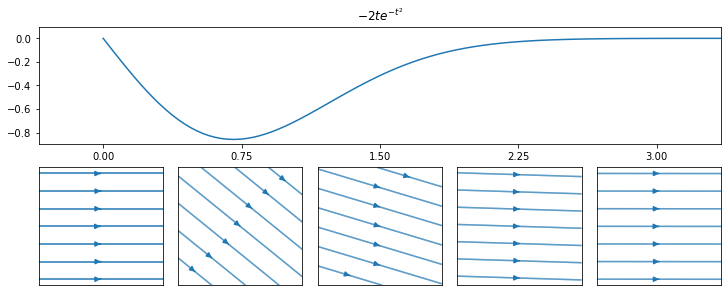

In [1]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-2, 2, 10)
y = np.linspace(-2, 2, 10)
X, Y = np.meshgrid(x, y)
U=V=np.ones_like(X)
start=[[-1.5,-1.5],[-1,-1],[-0.5,-0.5],[0,0],[0.5,0.5],[1,1],[1.5,1.5]]

import matplotlib.gridspec as gridspec
fig = plt.figure(constrained_layout=True,figsize=(10,4))
spec = gridspec.GridSpec(ncols=5, nrows=2, figure=fig)

def slope(t):
    return -2*t*np.exp(-t**2)

tvals=np.linspace(0,3.35,100)

n=5    #number of subplots

for s in range(n):
    ax=fig.add_subplot(spec[1,s])
    ax.xaxis.set_ticks([]), ax.yaxis.set_ticks([])
    t=3*s/(n-1)
    #ax.set_title('t='+str(t))
    ax.streamplot(X,Y,U,slope(t)*V,start_points=start,density=10)

ax = fig.add_subplot(spec[0, :])
ax.plot(tvals,slope(tvals))
ax.axis([-0.35,3.35,-0.9,0.1])
ax.xaxis.set_ticks([0,0.75,1.5,2.25,3])
ax.set_title('$-2t e^{-t^2}$')

plt.show()

To find an equation governing each streamline, we assume a parameterisation of the form $\underline{x}(s)=(x(s),y(s)_,z(s))$. Since the streamline is tangent to the velocity field it must satisfy the following equation, where $t$ is treated as constant:

\begin{equation}\frac{\mathrm{d}\underline{x}}{\mathrm{d}s}=\underline{u}(\underline{x},t).\end{equation}

Integrating the problem gives a family of streamlines. For the example given in equation {eq}`examplev`, the streamlines satisfy

\begin{equation}\frac{\mathrm{d}x}{\mathrm{d}s}=1, \quad \frac{\mathrm{d}y}{\mathrm{d}s}=-2te^{-t^2}.\end{equation}

The solution that passes through a given point $(x_0,y_0)$ is given by

\begin{equation}\underline{x}=(x_0+s, y_0-2te^{-t^2}s).\end{equation}

````{exercise}
:label: ex-streams
Find a parameterisation governing the streamlines of the flow $\underline{u}=(2x,2yt)$.
````

```{toggle}
The streamline for this problem that passes through satisfy $(x_0,y_0)$ at time $t$ is given as follows:
\begin{equation*}\frac{\mathrm{d}x}{\mathrm{d}s}=2x, \quad \frac{\mathrm{d}y}{\mathrm{d}s}=2ts \quad \rightarrow \quad (x,y)=(x_0 e^{2s},y_0 e^{2ts}).\end{equation*}

Note that the streamlines satisfy $y=kx e^{t}$, where $k=y_0/x_0$.
```

## The stream function

The stream function is a useful mathematical tool that can be used to find the streamlines for some types of flow. It applies only to two-dimensional flows $\underline{u}(\underline{x},t)$ that satisfy $\nabla.\underline{u}=0$. The latter condition means that the fluid is *incompressible*. We will explore the incompressibility condition in later sections of the notes.  

The stream function $\psi(x,y)$ satisfies

```{math}
:label: streamfun
\underline{u}=\left(\frac{\partial\psi}{\partial y},-\frac{\partial\psi}{\partial x}\right)
```

The incompressibility condition $\nabla.\underline{u}=0$ is required for consistency, due to the equivalence of the mixed second derivatives (Schwarz' condition):

\begin{equation}\nabla.\underline{u}=\frac{\partial^2\psi}{\partial x\partial y}-\frac{\partial^2 \psi}{\partial y\partial x}=0\end{equation}

The stream function also satisfies $\underline{u}.\nabla\psi=0$ :

\begin{equation}\underline{u}.\nabla\psi=\frac{\partial\psi}{\partial y}\frac{\partial\psi}{\partial x}+ \left(-\frac{\partial\psi}{\partial x}\right)\frac{\partial\psi}{\partial y}=0\end{equation}

Therefore, $\nabla\psi$ is perpendicular to $\underline{u}$, and so the contours of $\psi$ are **parallel** to $\underline{u}$.

In conclusion, the contours of $\psi$ are streamlines of the flow.


```{exercise}
:label: ex-strfun

Find the stream function for the flow $\underline{u}=\left(x^2y,-xy^2\right)$.  
Use the stream function to produce a contour plot of the flow on $-2\leq x,y\leq 2$.
```

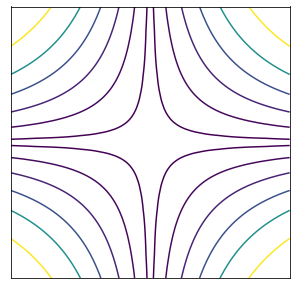

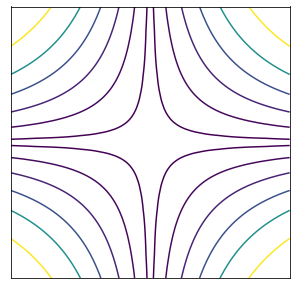

In [2]:
from myst_nb import glue
import numpy as np
import matplotlib.pyplot as plt

x=np.linspace(-2, 2, 100)
y=np.linspace(-2, 2, 100)

X,Y = np.meshgrid(x, y)
F=(X**2)*(Y**2)/2

# options to prettify the plot
fig,ax=plt.subplots(figsize=(5,5))
ax.axis([-2,2,-2,2])
ax.xaxis.set_ticks([]), ax.yaxis.set_ticks([])

ax.contour(X,Y,F,levels=[0.005,0.1,0.4,1,2,4])

glue("ppath_fig", fig, display=False)

````{toggle}

$\underline{u}=(x^2y,-xy^2)=\left(\frac{\partial\psi}{\partial y},-\frac{\partial\psi}{\partial x}\right) \quad \rightarrow \psi = \frac{x^2 y^2}{2}$

```python
x=np.linspace(-2, 2, 100)
y=np.linspace(-2, 2, 100)

X,Y = np.meshgrid(x, y)
F=(X**2)*(Y**2)/2

# options to prettify the plot
fig,ax=plt.subplots(figsize=(5,5))
ax.axis([-2,2,-2,2])
ax.xaxis.set_ticks([]), ax.yaxis.set_ticks([])

ax.contour(X,Y,F,levels=[0.005,0.1,0.4,1,2,4])

plt.show()
```

```{glue:} ppath_fig
```

````

Note: Some three-dimensional flows can also be treated as two-dimensional. This is the case for flows that are *axisymmetric*, meaning that they are symmetric about a given axis. An example of an axisymmetric flow is shown in the image below, which is from another CFD simulation [produced](https://uk.comsol.com/blogs/creating-2d-models-from-3d-geometries-in-comsol-multiphysics/) using the commercial software COMSOL.

<br>

```{image} navstok_img/non-newtonian.png
---
name: metweather
alt: alternative text
align: center
scale: 80%
---
```
<br>


## Particle paths
The streamlines indicate the direction of motion of fluid particles at a given moment. If the fluid is not steady (time-independent), then the streamlines do **not** show the paths taken by the fluid particles. This is illustrated by the below animation, which tracks several selected fluid particles as they move tangent to the evolving velocity field given in equation {eq}`examplev`.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

n = 15
xgrid=np.linspace(1,3,n)
ygrid=np.linspace(0,2,n)
X, Y = np.meshgrid(xgrid, ygrid)

t=0
U=np.ones(X.shape)
V=-2*t*np.exp(-t**2)*np.ones(X.shape)
tmax,fnum=3,100

def x(t0,t):
  return t+(1-t0)

def y(t0,t,y0):
  return y0+np.exp(-t**2)-np.exp(-t0**2)

#x = np.linspace(1, 3, 1000)

class testAnimation:

  def __init__(self):
    # First set up the figure, the axis, and the plot element we want to animate
    self.fig, ax = plt.subplots()
    plt.close()
    ax.set_xlim(( 1, 3))
    ax.set_ylim((0, 2))
    self.UVC = ax.quiver(X,Y,U,V)
    self.scat, = ax.plot([], [],'o', color='blue')

  # initialization function: plot the background of each frame
  def init(self):
      return (self.UVC, self.scat)

  # animation function. This is called sequentially  
  def animate(self, i):
      t=tmax/fnum*i;
      V=-2*t*np.exp(-t**2)*np.ones(X.shape)
      self.UVC.set_UVC(U,V)
      tgrid=np.arange(0,t,0.5)
      self.scat.set_data(x(0,t), y(0,t,np.linspace(0,2,10)))
      return (self.UVC, self.scat)

  def draw(self):
    global anim
    anim = animation.FuncAnimation(self.fig, self.animate, init_func=self.init,
                             frames=fnum, interval=1000*tmax/fnum, blit=True)


vis = testAnimation()
vis.draw()

# Note: below is the part which makes it work on Colab
rc('animation', html='jshtml')

#anim.save('fluid.gif', writer = 'imagemagick', fps=10)

anim

According to the definition of velocity, we can find the particle paths by solving the problem

\begin{equation}\frac{\mathrm{d}\underline{x}}{\mathrm{d}t}=\underline{u}(\underline{x},t).\end{equation}

For the example given in equation {eq}`examplev`, the particle paths satisfy

\begin{equation}\frac{\mathrm{d}x}{\mathrm{d}t}=1, \quad \frac{\mathrm{d}y}{\mathrm{d}t}=-2te^{-t^2}.\end{equation}

The solution that passes through a given point $(x_0,y_0)$ is given by

```{math}
:label: ptrajectory
\underline{x} (t-t_0+x_0,e^{-t^2}-e^{-t_0^2}+y_0).
```

In this example, the velocity approaches a constant value $(1,0)$ as $t$ increases. Since the evolved velocity field is "steady" (time-independent) the particle paths and streamlines for this flow eventually coincide.

````{exercise}
:label: ex-ppaths
Find the particle paths for the flow $\underline{u}=(\alpha,\beta t,0)$, where $\alpha, \beta$ are positive constants. Describe the shape of your solutions.
````

````{toggle}
**Streamlines :**

$\frac{\mathrm{d}x}{\mathrm{d}s}=\alpha \quad \rightarrow \quad x=\alpha s + x_0$

$\frac{\mathrm{d}y}{\mathrm{d}s}=\beta t \quad \rightarrow \quad y=\beta t s + y_0$

Combining the two expressions gives $y=\frac{\beta t}{\alpha}(x-x_0)+y_0$. This is the equation of the streamline at time $t$ that passes through $(x_0,y_0)$.   

**Particle paths :**

$\frac{\mathrm{d}x}{\mathrm{d}t}=\alpha \quad \rightarrow \quad x=\alpha t +x_0$  

$\frac{\mathrm{d}y}{\mathrm{d}t}=\beta t \quad \rightarrow \quad y=\beta \frac{t^2}{2}+y_0$

Combining the two expressions gives $y=\frac{\beta}{2 \alpha^2}(x-x_0)^2+y_0$. This is the path of a particle released from $(x_0,y_0)$ at time $t=0$.  

For this example, the streamlines are straight lines, and the particle paths are parabolas.

```{admonition} Note
:class: warning
In the case of the streamlines, we may obtain the following result using the chain rule

$\frac{\mathrm{d}y}{\mathrm{d}x}=\frac{\beta t}{\alpha} \quad \Rightarrow \quad y=\frac{\beta t}{\alpha}x+c$

However, we cannot use this treatment to solve for the particle paths since in that case $x=x(t)$, $y=y(t)$ and so $t$ must not be treated as constant.
```

````

## Streaklines

Fluid particles that pass through the same point at different times generally follow different paths. A streakline is the locus of all particles that have passed through a given point $\underline{x}_0$. This is what we see when we inject smoke or dye into a moving fluid. We can find streaklines by solving the particle path problem for a range of release times $t_0$. We may plot the result at a given time $t$.

The animation below shows a sequence of particles injected at intervals into the fluid described by equation {eq}`examplev`. Due to the changing vector field, the particles follow different trajectories depending on the time of release. The $(x,y)$ trajectory of a particle released at time $t_0$ is given in equation {eq}`ptrajectory`. The set of particles together define a streakline.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

n = 15
xgrid=np.linspace(1,3,n)
ygrid=np.linspace(0,2,n)
X, Y = np.meshgrid(xgrid, ygrid)

t=0
U=np.ones(X.shape)
V=-2*t*np.exp(-t**2)*np.ones(X.shape)
tmax,fnum=3,100

def x(t0,t):
  return t+(1-t0)

def y(t0,t):
  return 1+np.exp(-t**2)-np.exp(-t0**2)

#x = np.linspace(1, 3, 1000)

class testAnimation:

  def __init__(self):
    # First set up the figure, the axis, and the plot element we want to animate
    self.fig, ax = plt.subplots()
    plt.close()
    ax.set_xlim(( 1, 3))
    ax.set_ylim((0, 2))
    self.UVC = ax.quiver(X,Y,U,V)
    self.scat, = ax.plot([], [],'o', color='blue')

  # initialization function: plot the background of each frame
  def init(self):
      return (self.UVC, self.scat)

  # animation function. This is called sequentially  
  def animate(self, i):
      t=tmax/fnum*i;
      V=-2*t*np.exp(-t**2)*np.ones(X.shape)
      self.UVC.set_UVC(U,V)
      tgrid=np.arange(0,t,0.1)
      self.scat.set_data(x(tgrid,t), y(tgrid,t))
      return (self.UVC, self.scat)

  def draw(self):
    global anim
    anim = animation.FuncAnimation(self.fig, self.animate, init_func=self.init,
                             frames=fnum, interval=1000*tmax/fnum, blit=True)


vis = testAnimation()
vis.draw()

# Note: below is the part which makes it work on Colab
rc('animation', html='jshtml')

#anim.save('fluid.gif', writer = 'imagemagick', fps=10)

anim

The image below is a classic photograph taken from *An Album of Fluid Motion* (1982) by Van Dyke. The image shows streaklines over an airfoil in an oncoming fluid flow. The streaklines are illustrated by smoke particles that have been injected into the flow upstream. The flow is mostly very smooth, due to great care taken by the experimenters to reduce air disturbances, but notice some disturbance occuring in the fluid near to the trailing edge of the airfoil. We will investigate this phenomenon soon.

<br>

```{image} navstok_img/bbl.png
---
name: bbl
alt: alternative description
align: center
scale: 80%
---
```
<br>

If you are interested to see images and videos of fluid flow that have been recorded more recently, you could take a look at the [Gallery of Fluid Motion](https://gfm.aps.org/), presented by the Americal Physics Society Division of Fluid Dynamics. Many of the modern entries are computer simulations of fluid, rather than experimental footage.